In [1]:
from tensorflow.keras.applications import InceptionV3

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [2]:
import os

In [3]:
IMAGE_SIZE = [224, 224]

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [5]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

 95% 257M/269M [00:02<00:00, 140MB/s]
100% 269M/269M [00:02<00:00, 96.2MB/s]


In [6]:
!unzip /content/gender-classification-dataset.zip -d ./

Streaming output truncated to the last 5000 lines.
  inflating: ./Validation/male/067031.jpg.jpg  
  inflating: ./Validation/male/067038.jpg.jpg  
  inflating: ./Validation/male/067040.jpg.jpg  
  inflating: ./Validation/male/067046.jpg.jpg  
  inflating: ./Validation/male/067048.jpg.jpg  
  inflating: ./Validation/male/067054.jpg.jpg  
  inflating: ./Validation/male/067064.jpg.jpg  
  inflating: ./Validation/male/067068.jpg.jpg  
  inflating: ./Validation/male/067069.jpg.jpg  
  inflating: ./Validation/male/067086.jpg.jpg  
  inflating: ./Validation/male/067091.jpg.jpg  
  inflating: ./Validation/male/067099.jpg.jpg  
  inflating: ./Validation/male/067101.jpg.jpg  
  inflating: ./Validation/male/067102.jpg.jpg  
  inflating: ./Validation/male/067112.jpg.jpg  
  inflating: ./Validation/male/067117.jpg.jpg  
  inflating: ./Validation/male/067119.jpg.jpg  
  inflating: ./Validation/male/067133.jpg.jpg  
  inflating: ./Validation/male/067143.jpg.jpg  
  inflating: ./Validation/male/067152

In [7]:

train_path = r"/content/Training"
test_path = r"/content/Validation"

In [8]:
i_model = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [9]:
# don't train existing weights
for layer in i_model.layers:
    layer.trainable = False

In [10]:
# useful for getting number of output classes
folders = glob(r'/content/Training/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(i_model.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=i_model.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r"/content/Training",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 47009 images belonging to 2 classes.


In [17]:
test_set = test_datagen.flow_from_directory(r"/content/Validation",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 11649 images belonging to 2 classes.


In [20]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=100,
  validation_steps=65
)

Epoch 1/20
100/100 [==============================] - 66s 657ms/step - loss: 0.9399 - accuracy: 0.8863 - val_loss: 0.8887 - val_accuracy: 0.8938
Epoch 2/20
100/100 [==============================] - 53s 526ms/step - loss: 0.8727 - accuracy: 0.8988 - val_loss: 0.5768 - val_accuracy: 0.9231
Epoch 3/20
100/100 [==============================] - 52s 519ms/step - loss: 0.7881 - accuracy: 0.9034 - val_loss: 0.9838 - val_accuracy: 0.8918
Epoch 4/20
100/100 [==============================] - 50s 502ms/step - loss: 0.7815 - accuracy: 0.9078 - val_loss: 0.7182 - val_accuracy: 0.9202
Epoch 5/20
100/100 [==============================] - 51s 506ms/step - loss: 0.8839 - accuracy: 0.9062 - val_loss: 0.5222 - val_accuracy: 0.9365
Epoch 6/20
100/100 [==============================] - 51s 508ms/step - loss: 0.8082 - accuracy: 0.9119 - val_loss: 1.0218 - val_accuracy: 0.8995
Epoch 7/20
100/100 [==============================] - 51s 510ms/step - loss: 1.0343 - accuracy: 0.8972 - val_loss: 0.8495 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


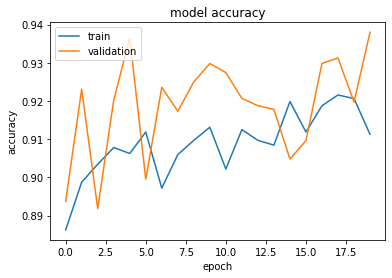

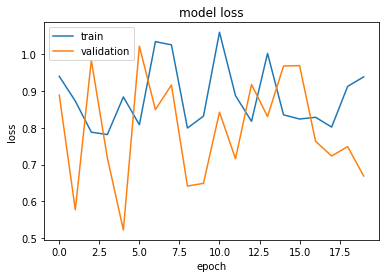

In [21]:
import matplotlib.pyplot as plt

print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
model.save("inception_new_gender.h5")